# Decision Tree Classifier
### Implementing a decision tree classifier to determine whether an animal is a mammal based on a set of binary characteristics

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Read in the data

In [107]:
df = pd.read_csv('data/vertebrate.csv')
display(df)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


## Convert data into a binary classification
### mammals versus non-mammals

In [108]:
# Create column and binarily classify whether entry is a mammal
df['Mammal'] = np.where(df['Class'] == 'mammals', 1, 0)

# Drop the old classification column
df = df.drop('Class', axis=1)

display(df)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Mammal
0,human,1,1,0,0,1,0,1
1,python,0,0,0,0,0,1,0
2,salmon,0,0,1,0,0,0,0
3,whale,1,1,1,0,0,0,1
4,frog,0,0,1,0,1,1,0
5,komodo,0,0,0,0,1,0,0
6,bat,1,1,0,1,1,1,1
7,pigeon,1,0,0,1,1,0,0
8,cat,1,1,0,0,1,0,1
9,leopard shark,0,1,1,0,0,0,0


## Create a decision tree classifier object

In [114]:
# Impurity measure is based on entropy. Constrain the generated tree with a maximum depth of 3
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)


## Train the classifier

In [110]:
# Extract the target class
y = df.iloc[:, -1:]

# Extract the data attributes
x = df.iloc[:, 1:-1]
clf.fit(x, y)

display(x)
display(y)

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


,Mammal
0,1
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


## Test Classifier

In [111]:
# Add test data
testData = [['lizard',0,0,0,0,1,1,'non-mammals'],
           ['monotreme',1,0,0,0,1,1,'mammals'],
           ['dove',1,0,0,1,1,0,'non-mammals'],
           ['whale',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=df.columns)

# Prepare the test data
testData['Mammal'] = np.where(testData['Mammal'] == 'mammals', 1, 0)

# Extract the class attributes and target class from 'testData'
yTest = testData.iloc[:, -1:]
xTest = testData.iloc[:, 1:-1]

# Apply the decision tree to classify the test records.
predY = clf.predict(xTest)

# Show table of results
results = pd.DataFrame()
results['Name'] = testData['Name']
results['Actual'] = yTest
results['Predicted'] = predY
display(results)


,Name,Actual,Predicted
0,lizard,0,0
1,monotreme,1,0
2,dove,0,0
3,whale,1,1


## Compute and print out the accuracy of the classifier

In [112]:
print("The accuracy of the classifier is:", accuracy_score(yTest, predY))

list(x.columns)

The accuracy of the classifier is: 0.75


['Warm-blooded',
 'Gives Birth',
 'Aquatic Creature',
 'Aerial Creature',
 'Has Legs',
 'Hibernates']

## Plot decision tree

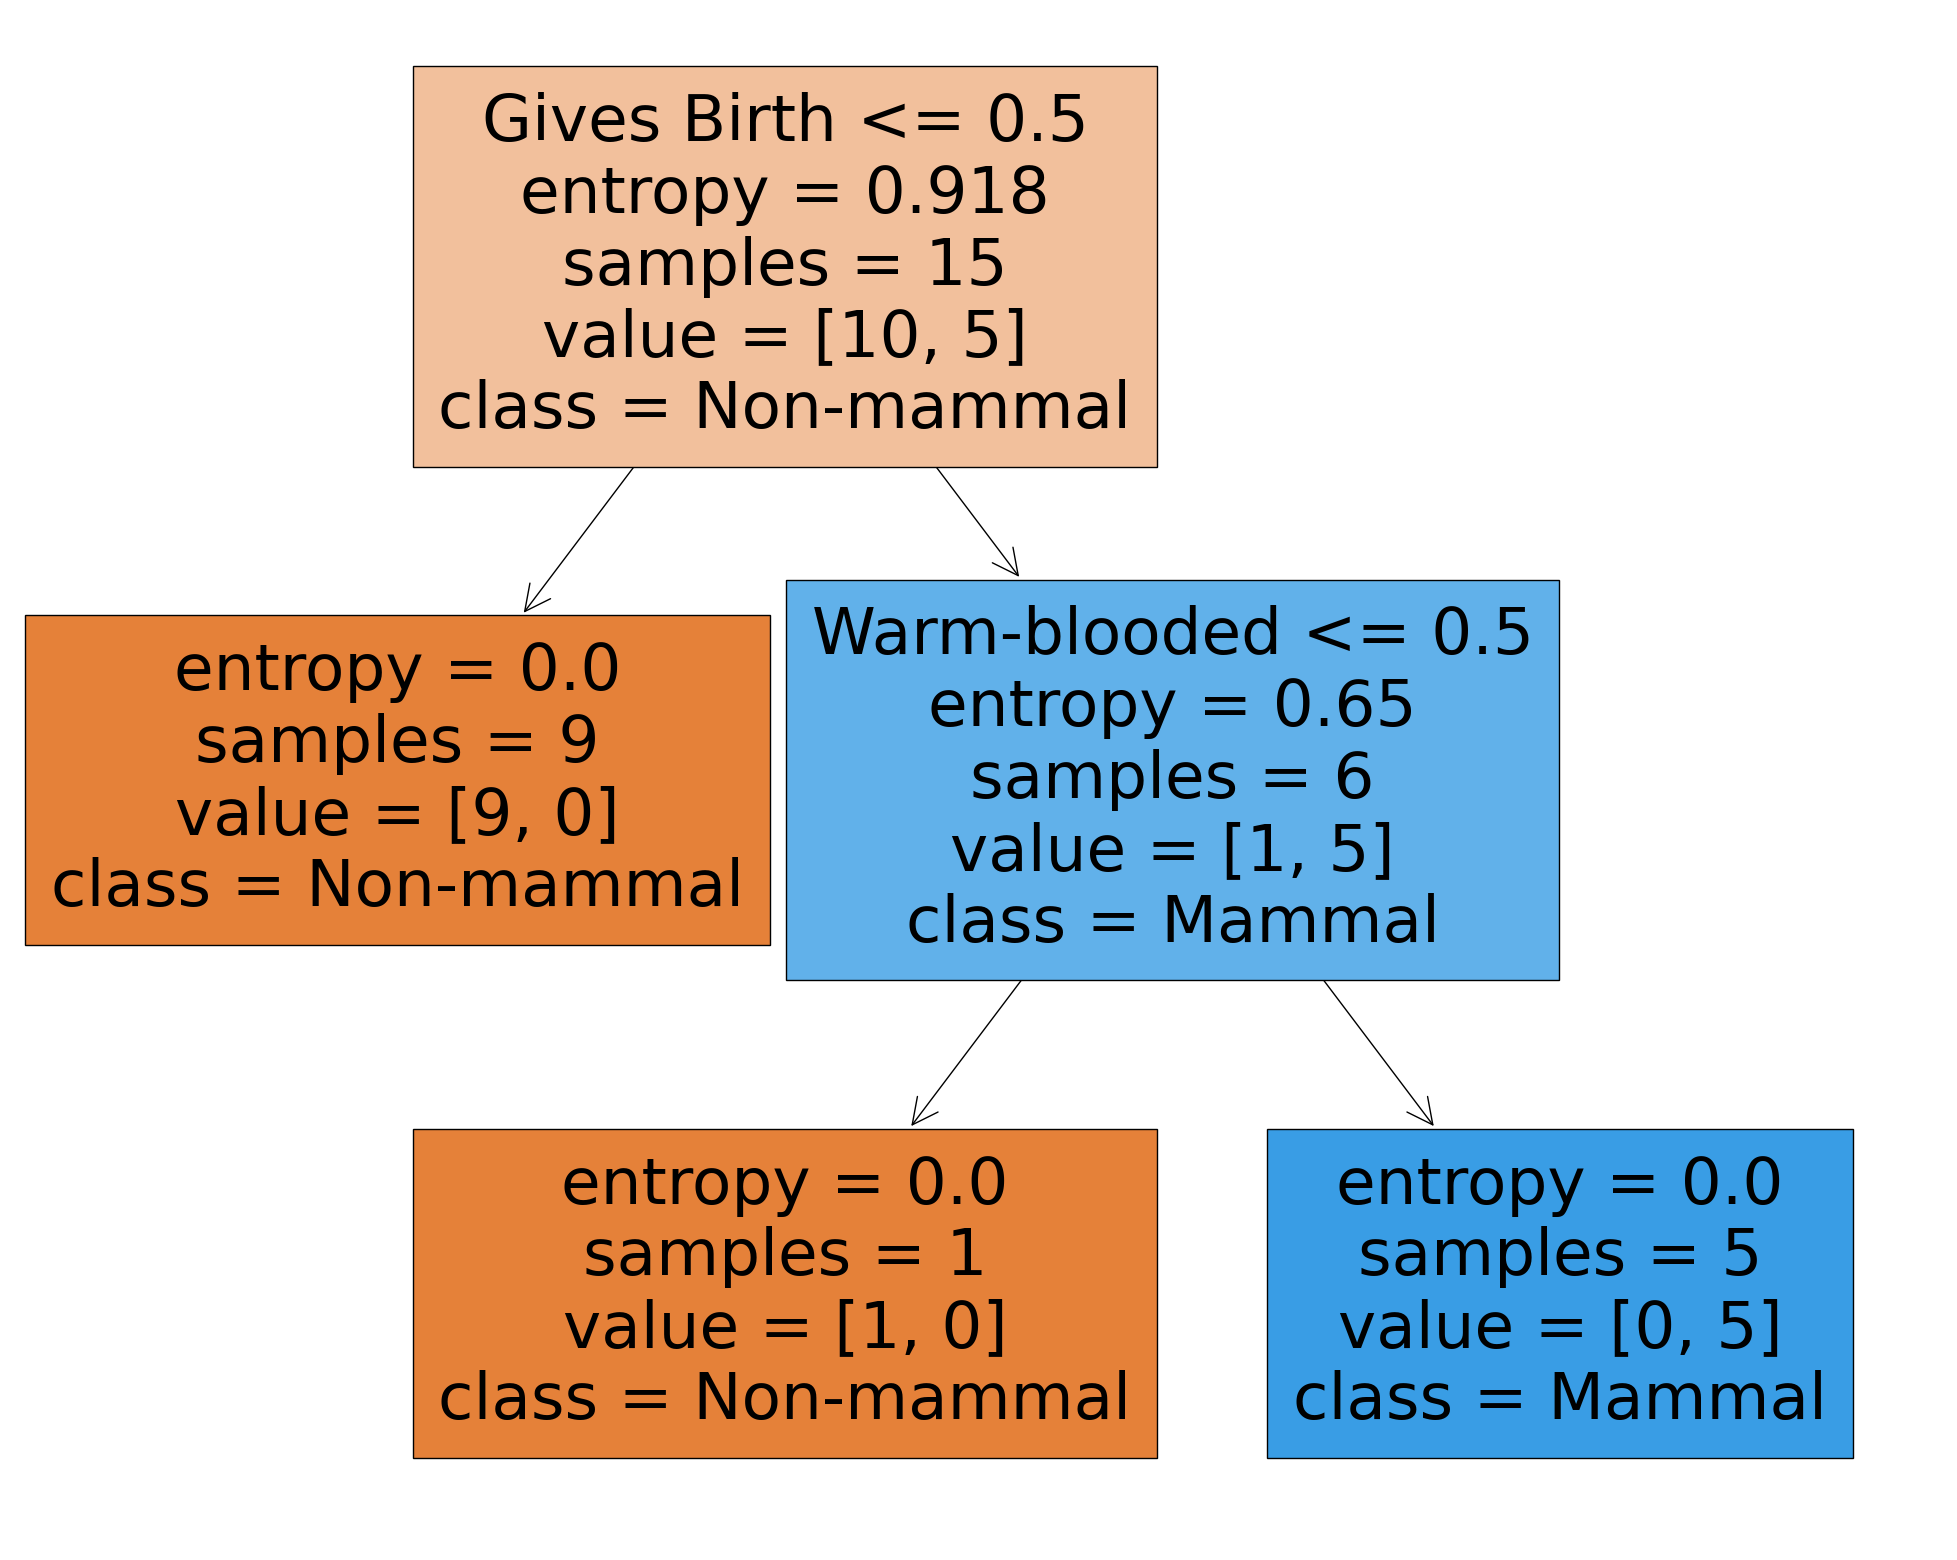

In [113]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(x.columns),  
                   class_names=['Non-mammal', 'Mammal'],
                   filled=True)